Step 1: Importing the necessary Libraries

In [2]:
# Step 1: Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
# Ensuring the visualizations appear inline
%matplotlib inline

Step 2: Loading and Exploring the given Dataset

In [5]:
#Loading the dataset
data = pd.read_csv("D:/Sankhyana Consultancy/MachineLearning/Project/ML Algorithms Project 1/Admission_Predict_Ver1.1.csv")
# Step 2a: Exploring the dataset
print(data.head())  

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [7]:
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None


In [9]:
print(data.describe())  

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.081868           1.143512    0.991004   
min      1.000000  290.000000    92.000000           1.000000    1.000000   
25%    125.750000  308.000000   103.000000           2.000000    2.500000   
50%    250.500000  317.000000   107.000000           3.000000    3.500000   
75%    375.250000  325.000000   112.000000           4.000000    4.000000   
max    500.000000  340.000000   120.000000           5.000000    5.000000   

            LOR         CGPA    Research  Chance of Admit   
count  500.00000  500.000000  500.000000         500.00000  
mean     3.48400    8.576440    0.560000           0.72174  
std      0.92545    0.604813    0.496884           0.14114  
min      1.00000    6.800000    0.000000           0.34000  
2

In [11]:
# Step 2b: Checking for missing values
print(data.isnull().sum())  # Make sure there are no missing values

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


Step 3: Data Cleaning and Feature Engineering

In [14]:
# Dropping irrelevant columns
data = data.drop('Serial No.', axis=1)
#Converting 'Chance of Admit ' into a binary column (Admitted: 1, Not Admitted: 0)
data['Admitted'] = data['Chance of Admit '].apply(lambda x: 1 if x >= 0.5 else 0)
# Check the changes
print(data.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   Admitted  
0              0.92         1  
1              0.76         1  
2              0.72         1  
3              0.80         1  
4              0.65         1  


Step 4: Visualizing the Data

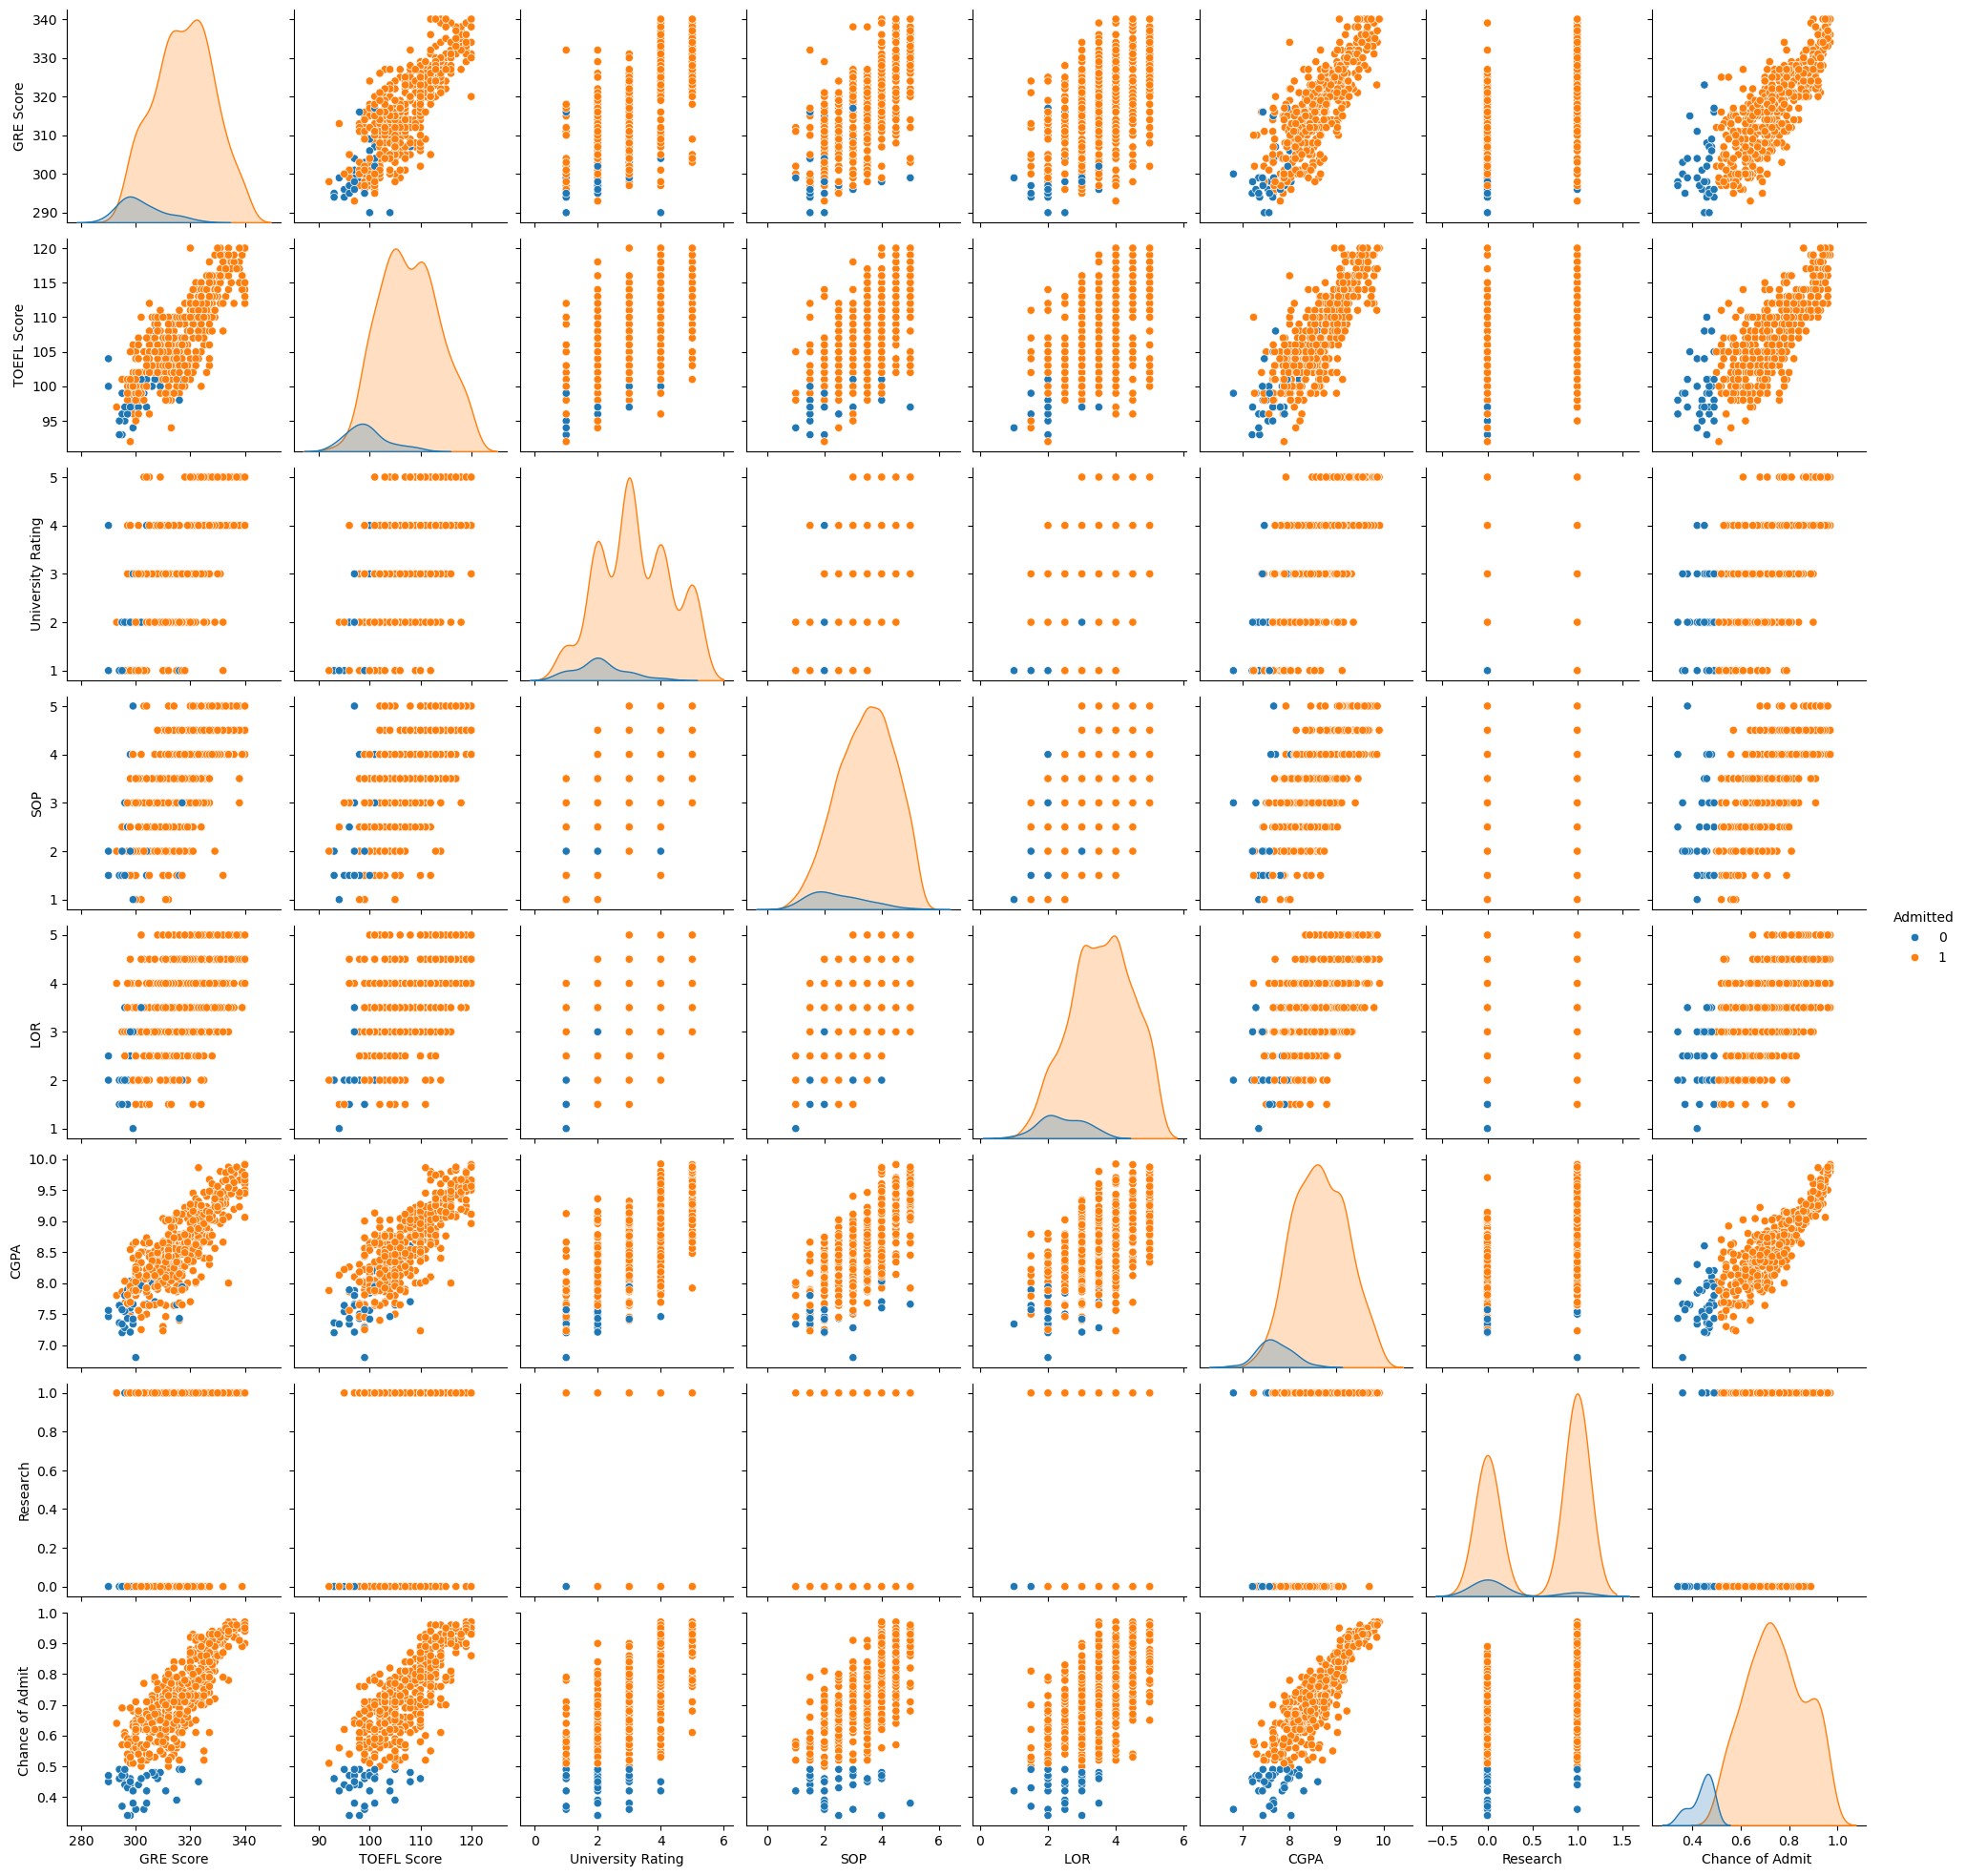

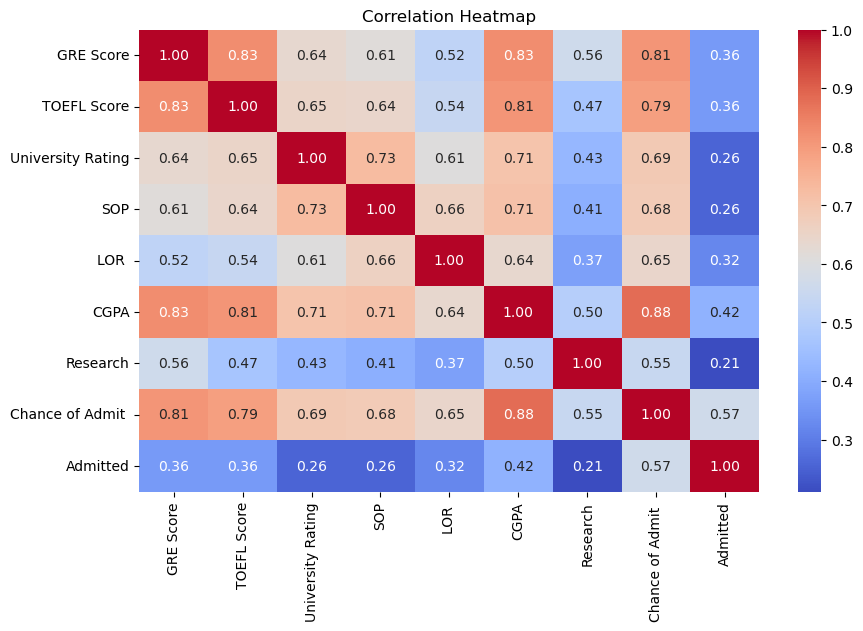

In [18]:
#Visualizing the relationships between features and target variable
sns.pairplot(data, hue='Admitted')
plt.show()
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Step 5: Feature Selection and Data Scaling

In [21]:
# Selecting features and target variable
X = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]
y = data['Admitted']
# Step 5a: Feature scaling (StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling the features

Step 6: Data Splitting into training and testing data sets

In [24]:
#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (350, 7)
Testing data shape: (150, 7)


Step 7: Building and Training the Logistic Regression Model

In [27]:
# Initializing and training the logistic regression model
log_reg = LogisticRegression()
# Training the model
log_reg.fit(X_train, y_train)
# Checking the coefficients
print(f"Model Coefficients: {log_reg.coef_}")

Model Coefficients: [[ 0.36768343  0.96503418 -0.35881275 -0.45213343  0.6228605   1.63808052
   0.06162704]]


Step 8: Model Evaluation

Model Accuracy: 0.95
% model accuracy: 95.33333333333334


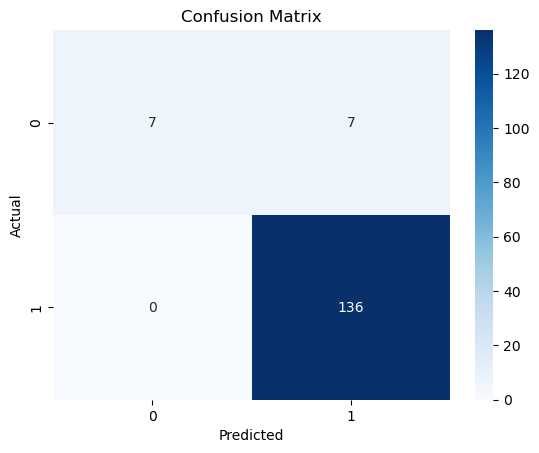

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        14
           1       0.95      1.00      0.97       136

    accuracy                           0.95       150
   macro avg       0.98      0.75      0.82       150
weighted avg       0.96      0.95      0.95       150



In [41]:
#Predicting the outcomes on test data
y_pred = log_reg.predict(X_test)
#Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
paccuracy=(accuracy*100)
print(f"% model accuracy: {paccuracy}")
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [43]:
import pickle
# Saving the logistic regression model to a .bin file
with open('logistic_regression_model.bin', 'wb') as f:
    pickle.dump(log_reg, f)
print("Model saved as 'logistic_regression_model.bin'")

Model saved as 'logistic_regression_model.bin'


In [45]:
#Saving the scaler used for feature scaling
with open('scaler.bin', 'wb') as f:
    pickle.dump(scaler, f)
print("Scaler saved as 'scaler.bin'")

Scaler saved as 'scaler.bin'


In [47]:
# Saving the preprocessed training data
with open('preprocessed_data.bin', 'wb') as f:
    pickle.dump((X_train, y_train), f)
print("Preprocessed data saved as 'preprocessed_data.bin'")

Preprocessed data saved as 'preprocessed_data.bin'
